In [33]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

In [44]:
# import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

In [15]:
iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, 
                  columns=iris_data.feature_names)

In [16]:
iris_df['target'] = iris_data.target
iris_df['target'] = iris_df['target'].apply(lambda x:iris_data.target_names[x])

In [17]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [25]:
key_x = 'sepal width (cm)'
key_y = 'petal width (cm)'

In [21]:
setosa = iris_df[[key_x, key_y]][iris_df['target'] == 'setosa']
versicolor = iris_df[[key_x,  key_y]][iris_df['target'] == 'versicolor']
virginica = iris_df[[key_x, key_y]][iris_df['target'] == 'virginica']

In [27]:
def fit_linear(x, y):
    model = LinearRegression()
    model.fit(x.reshape(-1,1), y)
    y = model.predict(x.reshape(-1,1))
    return y

In [28]:
y_setosa = fit_linear(setosa[key_x].values, setosa[key_y].values)
y_versicolor = fit_linear(versicolor[key_x].values, versicolor[key_y].values)
y_virginica = fit_linear(virginica[key_x].values, virginica[key_y].values)
y_full = fit_linear(iris_df[key_x].values, iris_df[key_y].values)

In [76]:
iris_df[key_x].corr(iris_df[key_y])

-0.36612593253643927

In [77]:
setosa[key_x].corr(setosa[key_y])

0.2327520113628792

In [78]:
versicolor[key_x].corr(versicolor[key_y])

0.6639987200241115

In [79]:
virginica[key_x].corr(virginica[key_y])

0.5377280262661887

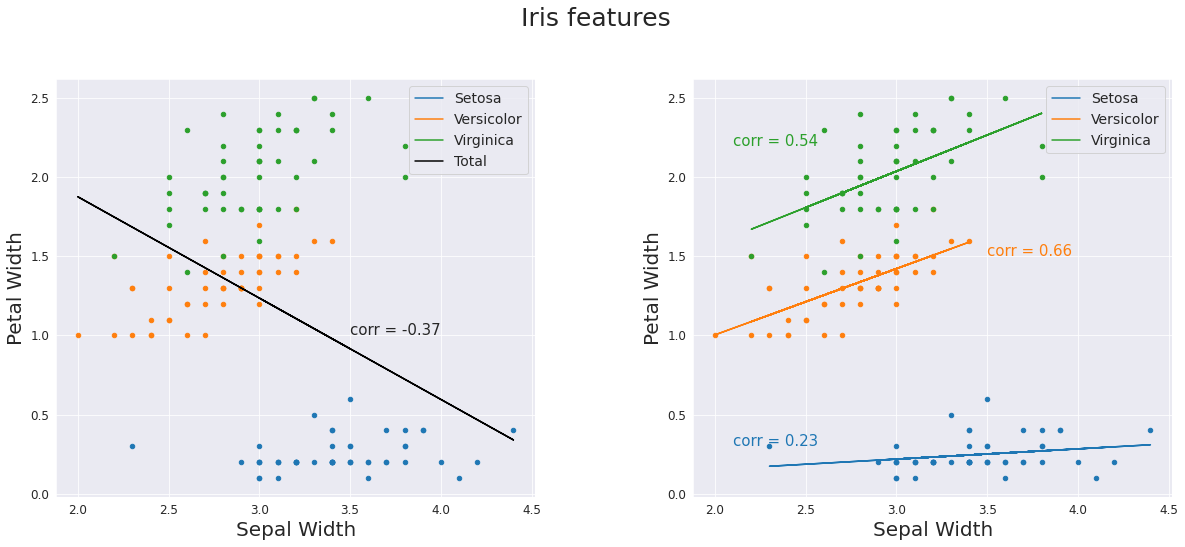

In [102]:
fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(20, 10))
fig. suptitle("Iris features", fontsize=25)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

setosa.plot.scatter(x=key_x, y=key_y, label='setosa', ax=axs[0], c=colors[0])
versicolor.plot.scatter(x=key_x, y=key_y, label='versicolor', ax=axs[0], c=colors[1])
virginica.plot.scatter(x=key_x, y=key_y, label='virginica', ax=axs[0], c=colors[2])

l4, = axs[0].plot(iris_df[key_x].values.reshape(-1,1), y_full, '-', c='k')
axs[0].text(3.5, 1, 'corr = -0.37', fontsize=15)

setosa.plot.scatter(x=key_x, y=key_y, ax=axs[1], c=colors[0])
versicolor.plot.scatter(x=key_x, y=key_y, ax=axs[1], c=colors[1])
virginica.plot.scatter(x=key_x, y=key_y, ax=axs[1], c=colors[2])

l1, = axs[1].plot(setosa[key_x].values.reshape(-1,1), y_setosa, '-', c=colors[0])
l2, = axs[1].plot(versicolor[key_x].values.reshape(-1,1), y_versicolor, '-', c=colors[1])
l3, = axs[1].plot(virginica[key_x].values.reshape(-1,1), y_virginica, '-', c=colors[2])
axs[1].text(2.1, 0.3, 'corr = 0.23', c=colors[0], fontsize=15)
axs[1].text(3.5, 1.5, 'corr = 0.66', c=colors[1], fontsize=15)
axs[1].text(2.1, 2.2, 'corr = 0.54', c=colors[2], fontsize=15)


axs[0].set_xlabel('Sepal Width', fontsize=20)
axs[1].set_xlabel('Sepal Width', fontsize=20)
axs[0].set_ylabel('Petal Width', fontsize=20)
axs[1].set_ylabel('Petal Width', fontsize=20)

fig.subplots_adjust(bottom=0.3, wspace=0.33)

# axs[0].legend(handles = [l1, l2, l3, l4] , labels=['Setosa', 'Versicolor', 'Virginica', 'Total'],
#              loc='lower left', bbox_to_anchor=(0, -0.4), ncol=2, fancybox=True, shadow=False)
axs[0].legend(handles = [l1, l2, l3, l4] , labels=['Setosa', 'Versicolor', 'Virginica', 'Total'], fontsize=14)
axs[1].legend(handles = [l1, l2, l3] , labels=['Setosa', 'Versicolor', 'Virginica'], fontsize=14)

plt.show()

In [64]:
reduced = iris_df[iris_df['target'] != 'setosa'].copy()

In [65]:
y_reduced = fit_linear(reduced[key_x].values, reduced[key_y].values)

In [80]:
reduced[key_x].corr(reduced[key_y])

0.5662025390798554

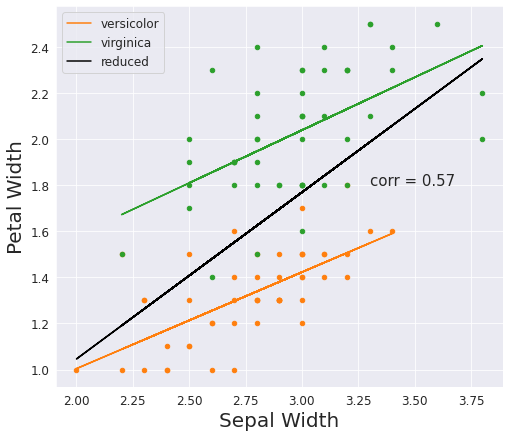

In [91]:
fig, axs = plt.subplots(ncols=1, sharey=True, figsize=(8, 7))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

versicolor.plot.scatter(x=key_x, y=key_y, ax=axs, c=colors[1])
virginica.plot.scatter(x=key_x, y=key_y, ax=axs, c=colors[2])

axs.plot(versicolor[key_x].values.reshape(-1,1), y_versicolor, '-', c=colors[1], label='versicolor')
axs.plot(virginica[key_x].values.reshape(-1,1), y_virginica, '-', c=colors[2], label='virginica')

axs.plot(reduced[key_x].values.reshape(-1,1), y_reduced, '-', c='k', label='reduced')
axs.text(3.3, 1.8, 'corr = 0.57', fontsize=15)

axs.set_xlabel('Sepal Width', fontsize=20)
axs.set_ylabel('Petal Width', fontsize=20)
plt.legend()
plt.show()